Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Note that in code sections, you must replace `stop("Not Implemented")` with your code. Otherwise, you will have points automatically deducted in the grading process.

**Please do not rename this file.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER/EXPLANATION HERE". In addition, please do not include your name on this assignment to ensure anonymity for the peer reviews.

---

# Problem 1

Take a look at the `SleepStudy` data within the `Lock5Data` package. The goal in this exercise will be to create a model to predict student GPAs. As an exploratory data analysis tool create a pairwise scatterplot (page 23 of lecture 9) to see whether there are any patterns visible between the following variables: 

- GPA 
- Gender 
- ClassYear 
- CognitionZscore 
- DepressionScore 
- AnxietyScore 
- StressScore 
- Drinks 
- WeekdaySleep 
- WeekendRise

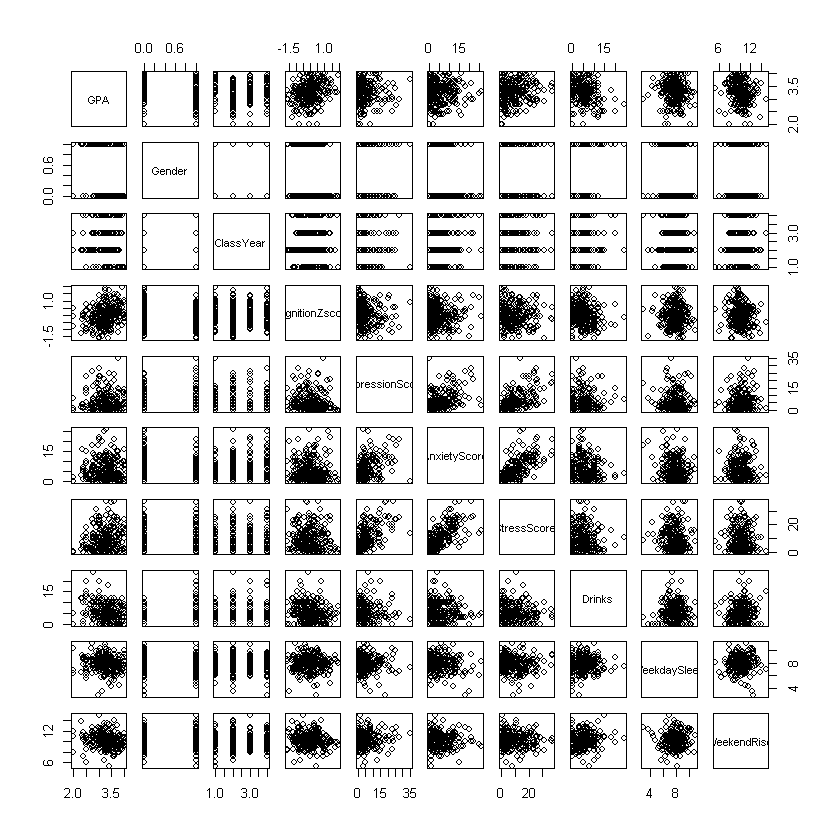

In [1]:
library(Lock5Data)
data("SleepStudy")
pairs(~ GPA + Gender + ClassYear+ CognitionZscore  + DepressionScore + AnxietyScore  +StressScore + Drinks +WeekdaySleep +WeekendRise, data=SleepStudy)
# YOUR CODE HERE
#stop("Not Implemented")

Next, create a plot to compare the effects of treating the `ClassYear` variable as a continuous or a categorical predictor of `GPA`. Hint: You will need to complete at least one very basic linear model to create the lines necessary in the plot. Be sure to include a title, clear labels, and context information!

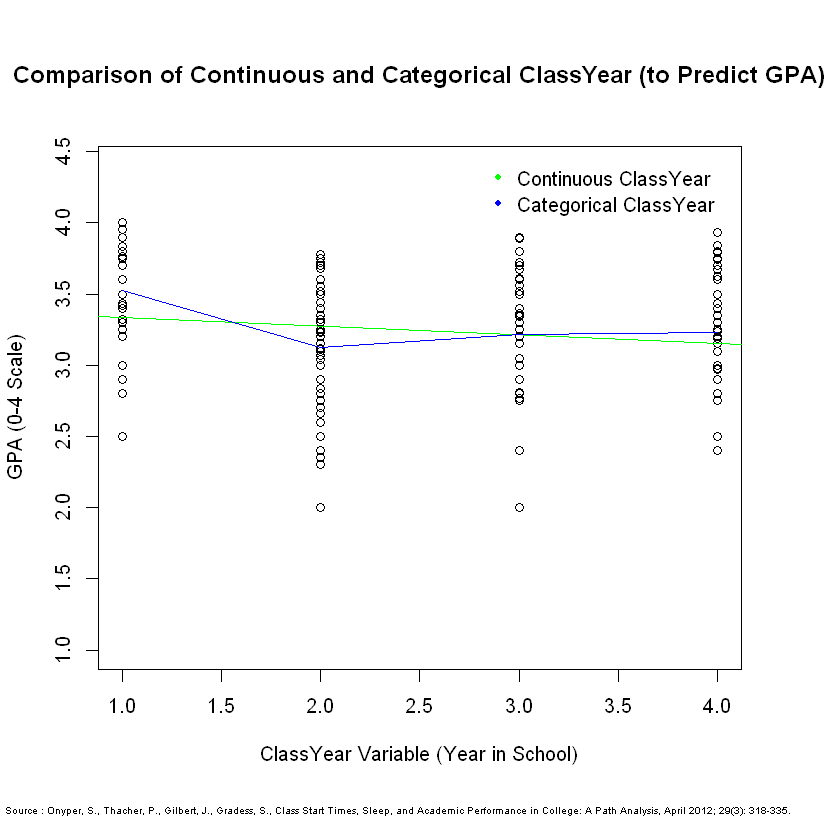

In [2]:
#### YOUR CODE HERE
# Plot Data
par(mar=c(7,4,6,4)+0.1)
plot( SleepStudy$ClassYear, SleepStudy$GPA, xlab="ClassYear Variable (Year in School)", ylab ="GPA (0-4 Scale)", ylim=(c(1,4.4)) )
title("Comparison of Continuous and Categorical ClassYear (to Predict GPA)")
mtext("Source : Onyper, S., Thacher, P., Gilbert, J., Gradess, S., Class Start Times, Sleep, and Academic Performance in College: A Path Analysis, April 2012; 29(3): 318-335. ", line=-28, at=2.4, cex=.52)

# Treat ClassYear as a continus value an Plot it
mod1 = lm(GPA~ClassYear , data=SleepStudy)
abline(mod1$coefficients, col="green")
#summary(mod1)

# Treat ClassYear as a categorical value an Plot it
mod2=lm(GPA~factor(ClassYear), data =SleepStudy )
Clines <- aggregate(mod2$fitted.values ~ SleepStudy$ClassYear, FUN =mean)
lines(Clines,col="blue")
#summary(mod2)

legend(2.8,4.5, c("Continuous ClassYear", "Categorical ClassYear"), col=c("green","blue"), pch=20, bty="n")

#stop("Not Implemented")

Following the steps used in the lecture, fit a model to predict a student's GPA. Include any intermediate steps in R that you take, explained with short comments in your code. Exploring interaction terms is encouraged, but not required.

In [3]:
# YOUR CODE HERE
#stop("Not Implemented")


# The model without interactions => {Residual standard error=0.3561 , Multiple R-squared=0.2518}
mod0 = lm(GPA~ Gender + ClassYear+ CognitionZscore  + DepressionScore + AnxietyScore  +StressScore + Drinks +WeekdaySleep +WeekendRise, data=SleepStudy)
#summary(mod0)

# Backward Selection (Drop WeekendRis [[(Pr(>|t|)=0.162957 )]] =>  {Residual standard error=0.3568 , Multiple R-squared=0.2457}
mod01 = lm(GPA~ Gender + ClassYear+ CognitionZscore  + DepressionScore + AnxietyScore  +StressScore + Drinks +WeekdaySleep, data=SleepStudy)
#summary(mod01)

# Backward Selection (Drop WeekdaySleep [[(Pr(>|t|)=0.138103 )]] =>  {Residual standard error=0.3577, Multiple R-squared=0.2389}
mod02 = lm(GPA~ Gender + ClassYear+ CognitionZscore  + DepressionScore + AnxietyScore  +StressScore + Drinks, data=SleepStudy)
#summary(mod02)

# Backward Selection (Drop Gender [[(Pr(>|t|)=0.140944 )]] =>  {Residual standard error= 0.3586, Multiple R-squared=0.2321}
mod03 = lm(GPA~ ClassYear +CognitionZscore+ DepressionScore + AnxietyScore  +StressScore + Drinks, data=SleepStudy)
#summary(mod03)
# ------ variables ClassYear, CognitionZscore,DepressionScore ,AnxietyScore, StressScore  and Drinks explain GPA well. 

# Use ClassYear as a categorical Variable as we found it more usefull in previous part 
mod04= lm(GPA~  factor(ClassYear)+CognitionZscore  + DepressionScore + AnxietyScore  +StressScore + Drinks , data=SleepStudy)
#summary(mod04)

# Dealing with lack of fit 
mod05= lm(GPA~  factor(ClassYear)+CognitionZscore + I(DepressionScore^2) + DepressionScore + AnxietyScore+StressScore+ Drinks , data=SleepStudy)
#summary(mod05)
# => DepressionScore is not significat

# Dealing with lack of fit 
mod06= lm(GPA~  factor(ClassYear)+CognitionZscore  + AnxietyScore + StressScore + Drinks+ I (Drinks^2) , data=SleepStudy)
#summary(mod06)
# => Drinks is not significat

# Dealing with lack of fit 
mod07= lm(GPA~  factor(ClassYear)+CognitionZscore  + AnxietyScore + I(AnxietyScore^2)+ StressScore , data=SleepStudy)
#summary(mod07)
# => AnxietyScore is not significat but factor(ClassYear), CognitionZscore and StressScore are

mod08= lm(GPA~  factor(ClassYear)+CognitionZscore  + StressScore , data=SleepStudy)
summary(mod08)

## Prediction => Predictin
X= data.frame(ClassYear =SleepStudy$ClassYear[30] , CognitionZscore = SleepStudy$CognitionZscore[30],StressScore= SleepStudy$StressScore[30] )
Y=predict(mod08, X, se.fit=TRUE)
Y
print("Predicted GPA : ") 
(Y$fit)
print("Actual GPA : ") 
SleepStudy$GPA[30]



Call:
lm(formula = GPA ~ factor(ClassYear) + CognitionZscore + StressScore, 
    data = SleepStudy)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11350 -0.22809  0.04886  0.25305  0.76976 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.405573   0.058717  58.000  < 2e-16 ***
factor(ClassYear)2 -0.358010   0.065037  -5.505 9.25e-08 ***
factor(ClassYear)3 -0.321365   0.071946  -4.467 1.21e-05 ***
factor(ClassYear)4 -0.294050   0.071261  -4.126 5.04e-05 ***
CognitionZscore     0.137376   0.032721   4.198 3.75e-05 ***
StressScore         0.011356   0.002872   3.954 0.000101 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3601 on 247 degrees of freedom
Multiple R-squared:  0.2222,	Adjusted R-squared:  0.2064 
F-statistic: 14.11 on 5 and 247 DF,  p-value: 3.825e-12


$fit
      1 
3.15236 

$se.fit
[1] 0.05612106

$df
[1] 247

$residual.scale
[1] 0.3601471

[1] "Predicted GPA : "


1 
3.15236

[1] "Actual GPA : "


[1] 3

Make a plot of the four residual analysis plots to make sure the regression does not violate any assumptions in a major way.

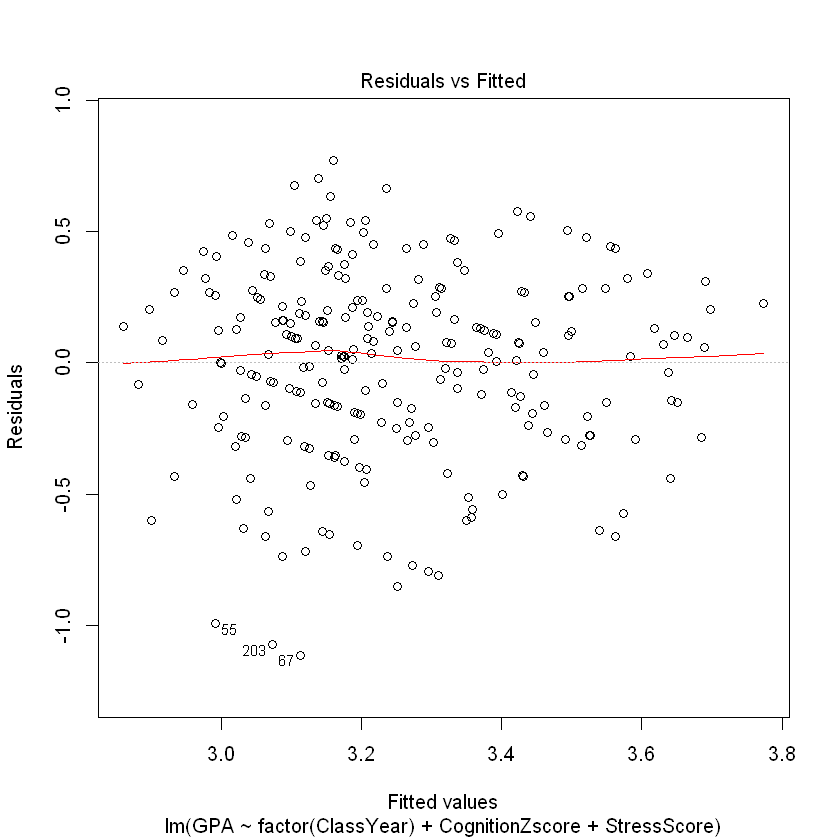

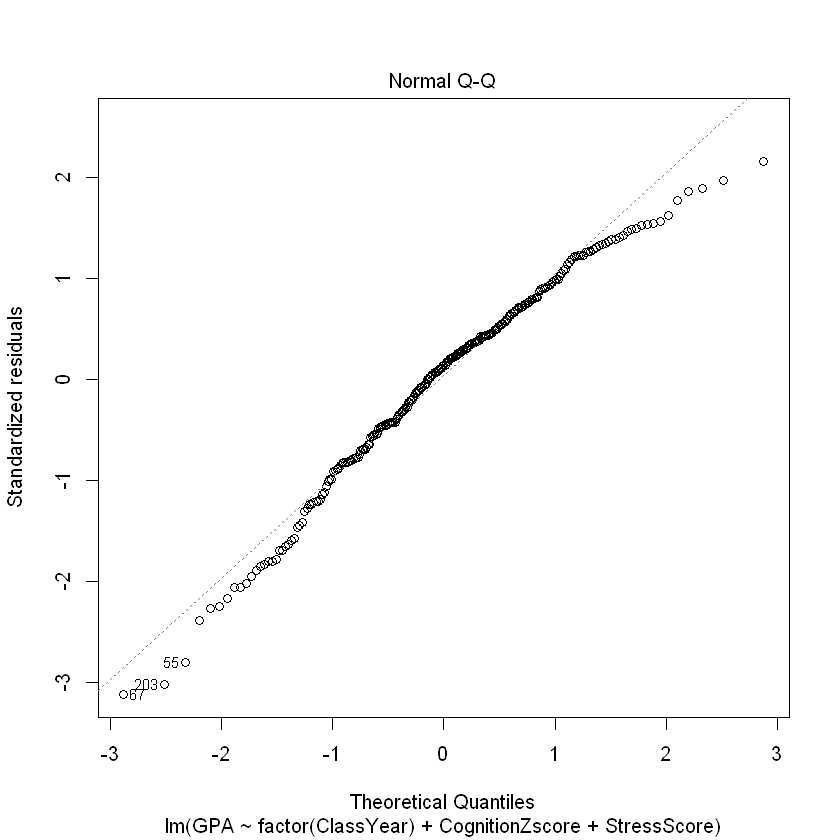

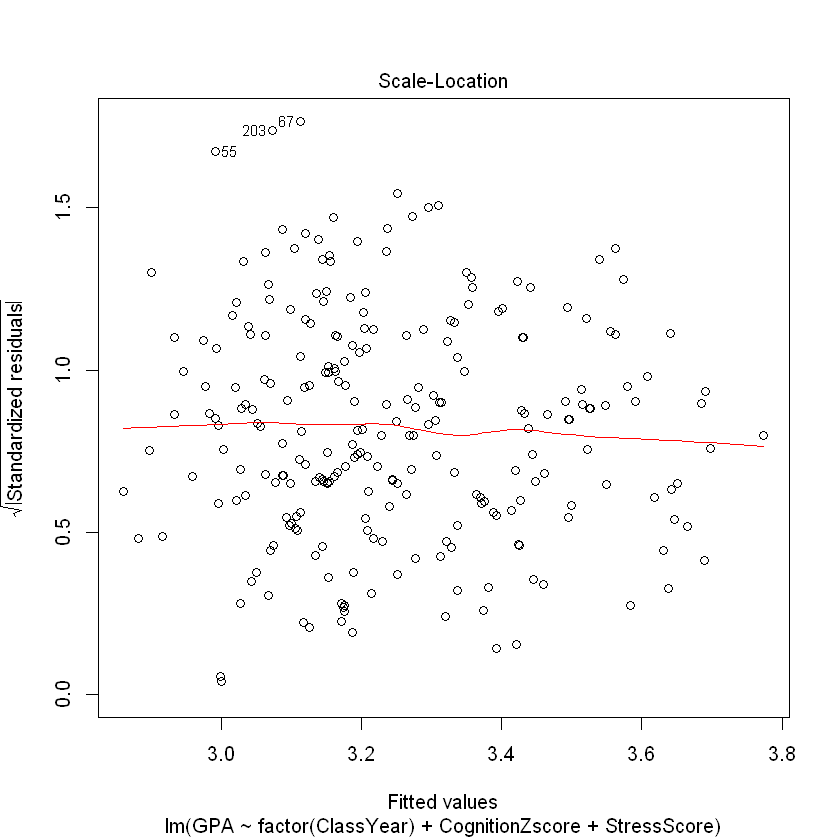

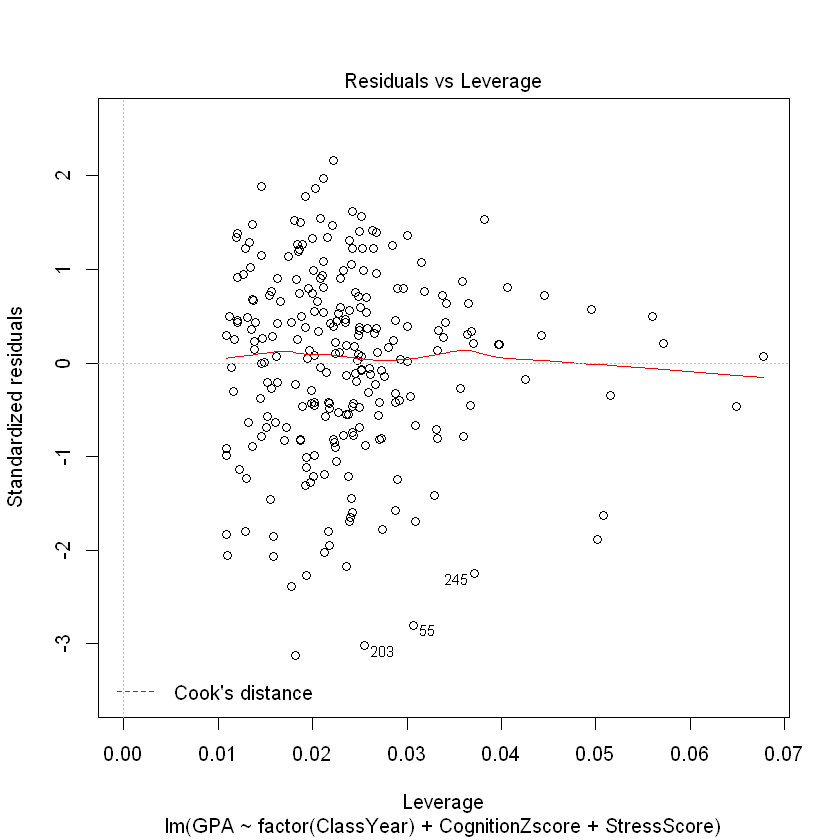

In [4]:
# YOUR CODE HERE
plot(mod08)
#stop("Not Implemented")

Comment briefly on the residual analysis.

YOUR ANSWER/EXPLANATION HERE

Although the first plot which shows residuals vs fitted is not perfect, it doesn't look bad and compared to previous residuals (I plotted residuals in some previous stops to see what's going on)it looks much more better. It seems that the model fits well because the distance of our linear regression model from the line at 0 is not so much in many cases abd they match in some cases. 
We can see a little heteroscedasticity in Normal Q-Q plot and the quantiles are different in the right and left tail but it looks it's not so bad and our assumptions are quite fair. 

---

# Problem 2

The `NutritionStudy` data set within the `Lock5Data` package contains information on the health and nutrition of 315 individuals. The purpose in this problem is to use this data to model `Quetelet`, a variable defined as follows:

$$\text{Quetelet} = \frac{\text{Weight}}{\text{Height}^2}$$

The 19th century Statistician Adolphe Quetelet developed the idea that one's height should be used to determine an ideal weight. This is now recognized as the body mass index (BMI). First, consider the variable `PriorSmoke`, which takes one of three values:

Value | Meaning
----- | --------------
1     | Never smoked
2     | Used to smoke
3     | Still smoke

Since this is an ordered scale, this could be treated as a continuous variable, but could also be treated as a categorical variable (factor). Create a plot to show the fitted line for using the `PriorSmoke` variable to model `Quetelet` as both a continuous variable and a categorical variable. Don't forget to include a title, legend, axis labels, ad context information!

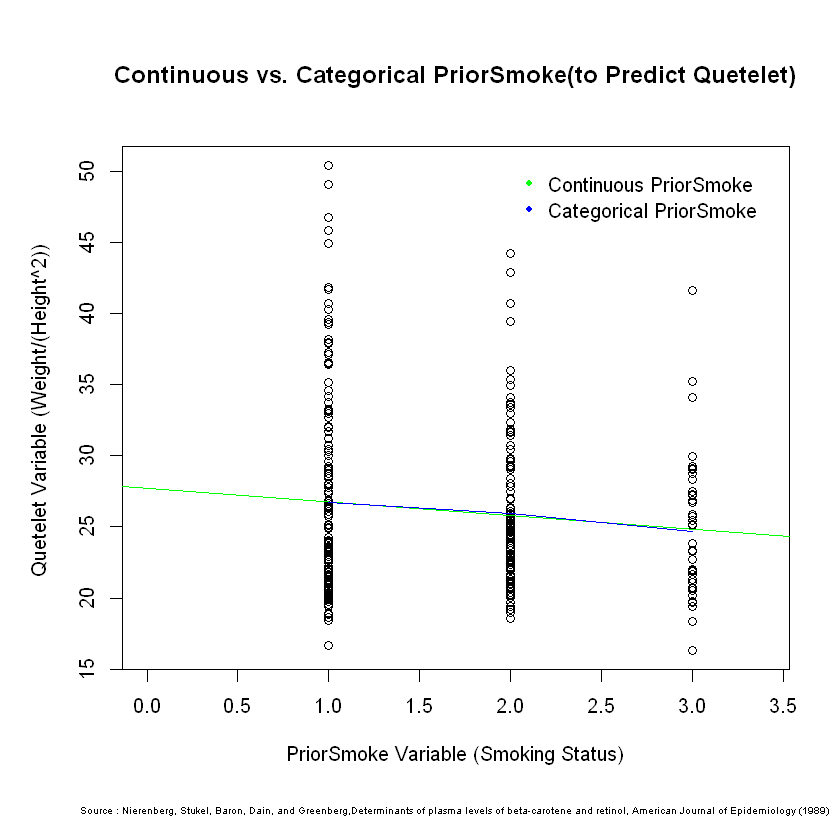

In [5]:
library(Lock5Data)
data("NutritionStudy")
NS <- NutritionStudy
# YOUR CODE HERE
# Plot Data
par(mar=c(7,5,6,2)+0.1)
plot( NS$PriorSmoke, NS$Quetelet, xlab="PriorSmoke Variable (Smoking Status)", ylab ="Quetelet Variable (Weight/(Height^2)) " , xlim =c(0,3.4))
title("Continuous vs. Categorical PriorSmoke(to Predict Quetelet)")
mtext("Source : Nierenberg, Stukel, Baron, Dain, and Greenberg,Determinants of plasma levels of beta-carotene and retinol, American Journal of Epidemiology (1989)", line=-28, at=1.7, cex=.52)

# Treat ClassYear as a continus value an Plot it
mod1 = lm(Quetelet~PriorSmoke , data=NS)
abline(mod1$coefficients, col="green")
#summary(mod1)

# Treat ClassYear as a categorical value an Plot it
mod2=lm(Quetelet~factor(PriorSmoke), data =NS )
Clines <- aggregate(mod2$fitted.values ~ NS$PriorSmoke, FUN =mean)
lines(Clines,col="blue")
#summary(mod2)

legend(2,51, c("Continuous PriorSmoke", "Categorical PriorSmoke"), col=c("green","blue"), pch=20, bty="n")

#stop("Not Implemented")

#stop("Not Implemented")

Next, fit a model for `Quetelet` with the following predictors:

- `Cholesterol`
- `PriorSmoke` (either as a continuous or categorical variable, based on your answer above)
- `BetaPlasma`
- `Gender`
- An interaction between `Gender` and `PriorSmoke`

Name the linear model object `first_lm` and include a summary of the model output.

In [6]:
# YOUR CODE HERE
#stop("Not Implemented")
first_lm = lm(Quetelet~Cholesterol+ PriorSmoke+ BetaPlasma+ Gender+ (Gender:PriorSmoke), data=NS)
summary(first_lm)


Call:
lm(formula = Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma + 
    Gender + (Gender:PriorSmoke), data = NS)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.554  -4.210  -1.129   3.020  22.333 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           29.197461   1.149597  25.398  < 2e-16 ***
Cholesterol            0.004314   0.002596   1.662  0.09760 .  
PriorSmoke            -1.550624   0.498175  -3.113  0.00203 ** 
BetaPlasma            -0.007945   0.001816  -4.375 1.67e-05 ***
GenderMale            -3.951574   2.756809  -1.433  0.15276    
PriorSmoke:GenderMale  1.976515   1.419836   1.392  0.16490    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.785 on 309 degrees of freedom
Multiple R-squared:  0.08924,	Adjusted R-squared:  0.0745 
F-statistic: 6.055 on 5 and 309 DF,  p-value: 2.296e-05


Use backward selection to produce a model with predictors that are all significant at an $\alpha$-level of 0.05. Name the final model `final_lm` and include a summary of the model object.

In [7]:
# YOUR CODE HERE

# Ignore the interaction between gender and PriorSmoke
second_lm = lm(Quetelet~Cholesterol+ PriorSmoke+ BetaPlasma+ Gender, data=NS)
#summary(second_lm)

# Ignore Cholesterol
third_lm = lm(Quetelet~ PriorSmoke+ BetaPlasma+Gender, data=NS)
#summary(third_lm)

#Ignore Gender
final_lm=lm(Quetelet~ PriorSmoke+ BetaPlasma, data=NS)
summary(final_lm)
#stop("Not Implemented")


Call:
lm(formula = Quetelet ~ PriorSmoke + BetaPlasma, data = NS)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.582  -4.145  -1.059   3.068  22.308 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.745776   0.935509   31.80  < 2e-16 ***
PriorSmoke  -1.241703   0.465026   -2.67  0.00798 ** 
BetaPlasma  -0.008186   0.001807   -4.53 8.39e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.806 on 312 degrees of freedom
Multiple R-squared:  0.07378,	Adjusted R-squared:  0.06785 
F-statistic: 12.43 on 2 and 312 DF,  p-value: 6.413e-06


---

# Problem 3

Use the American Community Survey (`ACS`) dataset in the `Lock5Data` package to perform an analysis of variance (ANOVA) to compare mean incomes in `Race` and `Sex` groups. Should the model include an interaction term? Begin by making an interaction plot to determine if the effect of being a different race affects the sexes differently. Don't forget to include a title, axis labels, legend, and context information. Some of the preliminary data management has been done for you.

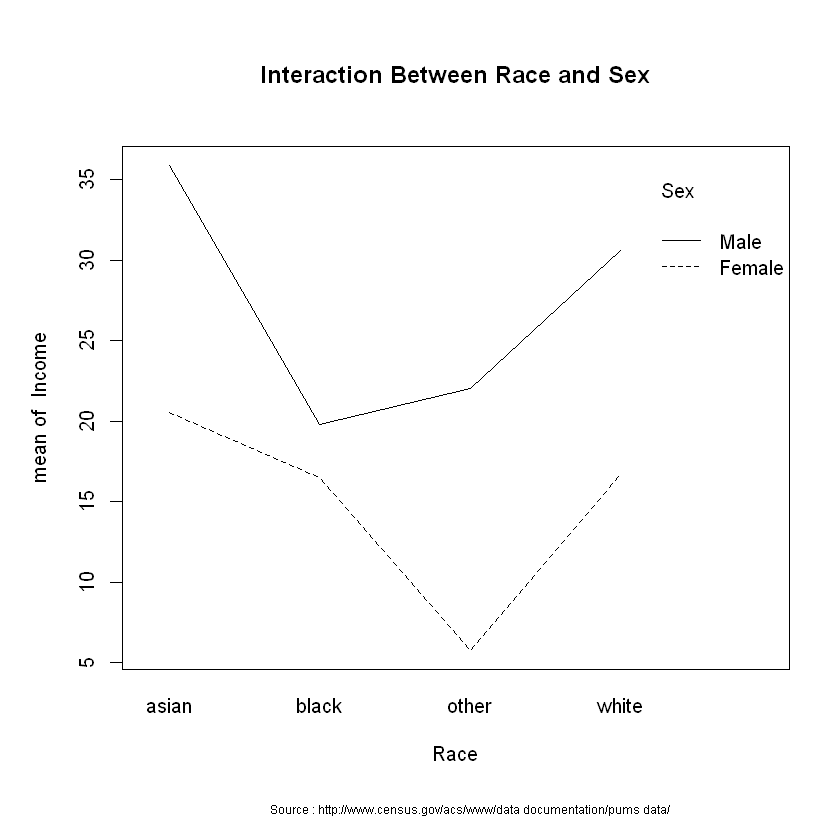

In [8]:
library(Lock5Data)
data("ACS")
ACS$Sex <- factor(ACS$Sex, labels = c("Female","Male"))
sub_acs <- subset(ACS, select = c("Income","Sex","Race"))
sub_acs <- na.omit(sub_acs)

par(mar=c(7,5,6,2)+0.1)
Race <- sub_acs$Race
Sex <- sub_acs$Sex
Income <- sub_acs$Income
interaction.plot(Race, Sex, Income)
title("Interaction Between Race and Sex")
mtext("Source : http://www.census.gov/acs/www/data documentation/pums data/", line=-28, at=3, cex=.6)
# YOUR CODE HERE
#stop("Not Implemented")

Next, perform an ANOVA for `Income` with the `Sex` and `Race` variables. Include the interaction between the two variables in the model as well. If necessary, use backward selection (don't add any more variables) to produce a final model. Name the final model `final_lm` and include a summary of the model object. Use an $\alpha$-level of 0.05 to determine whether variables are statistically significant.

In [9]:
# YOUR CODE HERE
mod0 = lm(Income ~ Sex + Race + (Sex:Race), data=sub_acs)
summary(mod0)
## Delete the Interaction between Race and Sex
mod1 = lm(Income ~ Sex + Race, data=sub_acs)
summary(mod1)
## Delete Race
final_lm = lm(Income ~ Sex , data=sub_acs)
summary(final_lm)

anova(final_lm)
#stop("Not Implemented")


Call:
lm(formula = Income ~ Sex + Race + (Sex:Race), data = sub_acs)

Residuals:
   Min     1Q Median     3Q    Max 
-35.87 -16.68 -14.68   9.46 532.41 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)        20.5440     8.4865   2.421   0.0157 *
SexMale            15.3303    11.1115   1.380   0.1681  
Raceblack          -4.0363    10.6274  -0.380   0.7042  
Raceother         -14.7815    12.1261  -1.219   0.2232  
Racewhite          -3.8653     8.7778  -0.440   0.6598  
SexMale:Raceblack -12.0609    15.1225  -0.798   0.4254  
SexMale:Raceother   0.9507    16.6364   0.057   0.9544  
SexMale:Racewhite  -1.4142    11.6080  -0.122   0.9031  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42.43 on 817 degrees of freedom
Multiple R-squared:  0.03024,	Adjusted R-squared:  0.02193 
F-statistic: 3.639 on 7 and 817 DF,  p-value: 0.0007105



Call:
lm(formula = Income ~ Sex + Race, data = sub_acs)

Residuals:
   Min     1Q Median     3Q    Max 
-35.01 -16.97 -12.62   9.93 532.77 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.753      5.740   3.790 0.000162 ***
SexMale       13.257      2.974   4.457 9.46e-06 ***
Raceblack     -9.130      7.431  -1.229 0.219584    
Raceother    -14.511      8.261  -1.757 0.079346 .  
Racewhite     -4.781      5.735  -0.834 0.404710    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42.38 on 820 degrees of freedom
Multiple R-squared:  0.02895,	Adjusted R-squared:  0.02422 
F-statistic: 6.112 on 4 and 820 DF,  p-value: 7.551e-05



Call:
lm(formula = Income ~ Sex, data = sub_acs)

Residuals:
   Min     1Q Median     3Q    Max 
-29.75 -16.30 -15.30  10.25 533.25 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.295      1.997   8.161 1.24e-15 ***
SexMale       13.458      2.966   4.538 6.53e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42.4 on 823 degrees of freedom
Multiple R-squared:  0.02441,	Adjusted R-squared:  0.02323 
F-statistic: 20.59 on 1 and 823 DF,  p-value: 6.528e-06


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Sex,1,37028.43,37028.432,20.59264,6.527636e-06
Residuals,823,1479868.62,1798.139,NA,NA


Regardless of what your final model was above, conduct pairwise t-tests to see if any pairs of races have significantly different mean incomes. Use the Bonferroni correction on the p-values to adjust for multiple comparisons.

In [10]:
# YOUR CODE HERE
#aggregate(Income, by=list(Race, Sex), mean)
pairwise.t.test(Income[Sex=="Male"], Race[Sex=="Male"], p.adjust.method="bonferroni")
pairwise.t.test(Income[Sex=="Female"], Race[Sex=="Female"], p.adjust.method="bonferroni")
#stop("Not Implemented")


	Pairwise comparisons using t tests with pooled SD 

data:  Income[Sex == "Male"] and Race[Sex == "Male"] 

      asian black other
black 1     -     -    
other 1     1     -    
white 1     1     1    

P value adjustment method: bonferroni 


	Pairwise comparisons using t tests with pooled SD 

data:  Income[Sex == "Female"] and Race[Sex == "Female"] 

      asian black other
black 1.00  -     -    
other 0.52  0.96  -    
white 1.00  1.00  0.52 

P value adjustment method: bonferroni 

Are any significantly different from each other? How does this match up with your ANOVA outcome? Answer breifly in only a sentence or two.

YOUR ANSWER/EXPLANATION HERE
No. As we saw in ANOVA, Race is not a good predicator for income and unlike Sex, having different Race doesn't affect income. 